1. Data Cleansing
2. Exploration Data Analysis (EDA)
BÀI TẬP THỰC HÀNH MÔN NHẬP MÔN PHÂN TÍCH DỮ LIỆU VÀ HỌC SÂU
11
3. Kỹ thuật function chain trong Pandas – pipe()
4. Feature Engineering
5. Data Wrangling
Mô tả dữ liệu: The sinking of the Titanic is one of the most infamous shipwrecks in history. On
April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic
sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone
onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some
element of luck involved in surviving, it seems some groups of people were more likely to
survive than others.


In [116]:
import pandas as pd

In [117]:
def load_data(filename):
    return pd.read_csv(filename)

In [118]:
filename = "titanic_disaster.csv"
tidisater = load_data(filename)
tidisater.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


<Axes: >

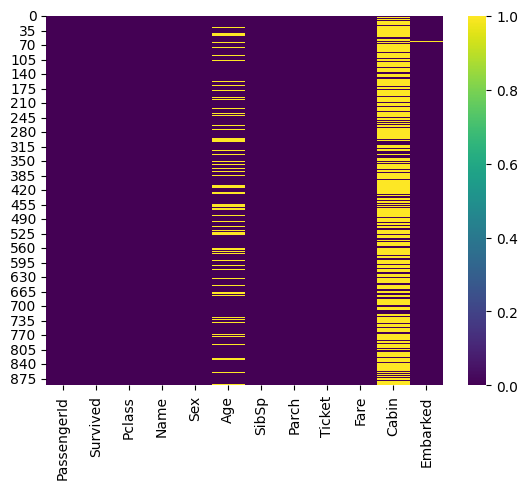

In [119]:
dfage = tidisater[tidisater['Age'].isna()]
print(dfage.count())
dfage = tidisater[tidisater['Cabin'].isna()]
print(dfage.count())

dfembarked = tidisater[tidisater['Embarked'].isna()]
print(dfembarked.count())

import seaborn as sns
sns.heatmap(tidisater.isna(),cmap='viridis')
#

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
tách cột xong thì xóa luôn cột Name


In [120]:
tidisater [['fistName','secondName']]= tidisater['Name'].str.split(',',expand = True)
tidisater_splitname = tidisater.drop("Name",axis=1)
tidisater_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [121]:
tidisater['Sex'] = tidisater['Sex'].replace({'male': 'M', 'female': 'F'})
tidisater


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",M,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng
vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

<Axes: xlabel='Pclass', ylabel='Age'>

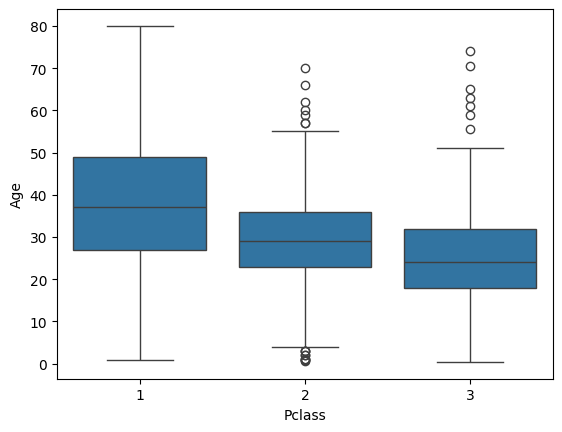

In [122]:
import seaborn as sns
sns.boxplot(y='Age',x='Pclass',data=tidisater)

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

In [123]:
tidisater.loc[tidisater["Pclass"] == 1, "Age"] = tidisater.loc[tidisater["Pclass"] == 1, "Age"].fillna(tidisater.loc[tidisater["Pclass"] == 1, "Age"].median())
tidisater.loc[tidisater["Pclass"] == 2, "Age"] = tidisater.loc[tidisater["Pclass"] == 2, "Age"].fillna(tidisater.loc[tidisater["Pclass"] == 2, "Age"].median())
tidisater.loc[tidisater["Pclass"] == 3, "Age"] = tidisater.loc[tidisater["Pclass"] == 3, "Age"].fillna(tidisater.loc[tidisater["Pclass"] == 3, "Age"].median())


In [125]:

import seaborn as  sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(tidisater.isna(), yticklabels= False, cbar=True,cmap='viridis')


<Axes: >

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
và ( age > 60): Older

In [126]:
#
tidisater['Agegroup'] = pd.cut(tidisater['Age'], bins=[-float('inf'), 12, 18, 60, float('inf')], labels=['Kid', 'Teen', 'Adult', 'Older'], right=True)
# tidisater.loc[(tidisater['Age']<=12),'Agegroup']='Kid'
# tidisater.loc[(tidisater['Age']>12)&(tidisater['Age']<18),'Agegroup']='Teen'
# tidisater.loc[(tidisater['Age']>18)&(tidisater['Age']<=60),'Agegroup']='Adult'
# tidisater.loc[(tidisater['Age']>60),'Agegroup']='Older'
tidisater.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fistName,secondName,Agegroup,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Adult
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Adult
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Adult
5,6,0,3,"Moran, Mr. James",M,24.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,teen


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,
Mrs, Miss, Master ra khỏi “secondName”